<a href="https://colab.research.google.com/github/ikedrfsCD/practicarepo/blob/main/Pract5_ICD_UCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [11]:
sns.set(style="whitegrid", palette="muted")

In [12]:
# Revisar la ubicación del dataset (/dataset/titanic.csv)
df = pd.read_csv("MarathonData.csv")

print("Dimensiones del dataset:", df.shape)
df.head()

# Verificamos tipos de datos y valores nulos
# info: Nombre des variables, tipo de variable (dato)
df.info()

# Calculo de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isna().sum())

Dimensiones del dataset: (87, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB

Valores nulos por columna:
id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64


In [13]:
# Observar datos que contiene cada una de las columnas
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [14]:
#Eliminar columnas irrelevantes para el análisis debido a que aportan poca información. En el caso de las relacionadas con categoría, no se tiene un diccionario o información previa para entender su naturaleza. Se buscará información posterior.
df=df.drop(columns=['Name'])
df=df.drop(columns=['id'])
df=df.drop(columns=['Marathon'])
df=df.drop(columns=['CATEGORY'])
df=df.drop(columns=['Category'])
#Eliminar columnas con un porcentaje muy alto de NA (Crosstraining tiene 85% de NA)
df=df.drop(columns=['CrossTraining'])

In [15]:
#Transformar columna a tipo númerico puesto que los datos son coherentes con la medida del tiempo
df['Wall21']= pd.to_numeric(df['Wall21'], errors='coerce')

In [16]:
#Revisión del estado actual del dataset
df.info()
df.head()
print("\nValores nulos por columna:")
print(df.isna().sum())
#Se observa que la columna Wall21 ahora tiene 6 valores nulos, se procederá a imputar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   km4week       87 non-null     float64
 1   sp4week       87 non-null     float64
 2   Wall21        81 non-null     float64
 3   MarathonTime  87 non-null     float64
dtypes: float64(4)
memory usage: 2.8 KB

Valores nulos por columna:
km4week         0
sp4week         0
Wall21          6
MarathonTime    0
dtype: int64


In [17]:
#Imputación de valores nulos con la media, en "Wall 21"
df['Wall21'].fillna(df['Wall21'].mean(), inplace=True)

/tmp/ipython-input-1773315646.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Wall21'].fillna(df['Wall21'].mean(), inplace=True)


In [18]:
#Ultima revisión del dataset
df.info()
print("\nValores nulos por columna:")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   km4week       87 non-null     float64
 1   sp4week       87 non-null     float64
 2   Wall21        87 non-null     float64
 3   MarathonTime  87 non-null     float64
dtypes: float64(4)
memory usage: 2.8 KB

Valores nulos por columna:
km4week         0
sp4week         0
Wall21          0
MarathonTime    0
dtype: int64


In [19]:
#Revisión de estadística descriptiva con las columnas restantes
df.describe()

,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,87.000000
mean,62.347126,139.840706,1.630617,3.319080
std,26.956019,1191.427864,0.203014,0.376923
min,17.900000,8.031414,1.160000,2.370000
25%,44.200000,11.498168,1.490000,3.045000
50%,58.800000,12.163424,1.630617,3.320000
75%,77.500000,12.854036,1.755000,3.605000
max,137.500000,11125.000000,2.050000,3.980000


**Conclusiones basadas en estadística descriptiva**


*   El tiempo promedio del maraton (3.3 hrs) es coherente con el tiempo de atletas experimentados.
*   La velocidad tiene valores atípicos, existe un max de 11125, parece un error






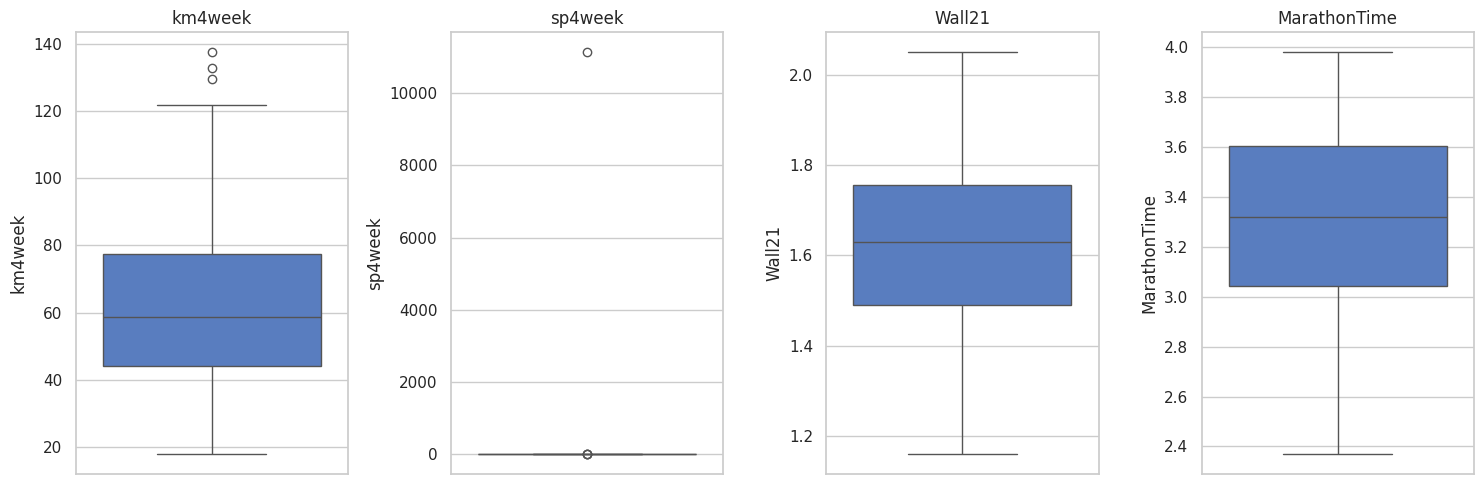

In [20]:
# Select only the numerical columns for boxplots
numerical_cols = df.select_dtypes(include=np.number).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [21]:
print("Top 5 maximum values of 'sp4week' column:")
display(df['sp4week'].nlargest(5))

Top 5 maximum values of 'sp4week' column:


,sp4week
81,11125.000000
15,14.970492
0,14.434783
17,14.336538
12,14.078947


In [22]:
df = df.drop(81)
print("Row 81 dropped.")
display(df.head())

Row 81 dropped.


,km4week,sp4week,Wall21,MarathonTime
0,132.8,14.434783,1.16,2.37
1,68.6,13.674419,1.23,2.59
2,82.7,13.520436,1.30,2.66
3,137.5,12.258544,1.32,2.68
4,84.6,13.945055,1.36,2.74


In [23]:
print("Top 5 maximum values of 'sp4week' column:")
display(df['sp4week'].nlargest(5))

Top 5 maximum values of 'sp4week' column:


,sp4week
15,14.970492
0,14.434783
17,14.336538
12,14.078947
4,13.945055


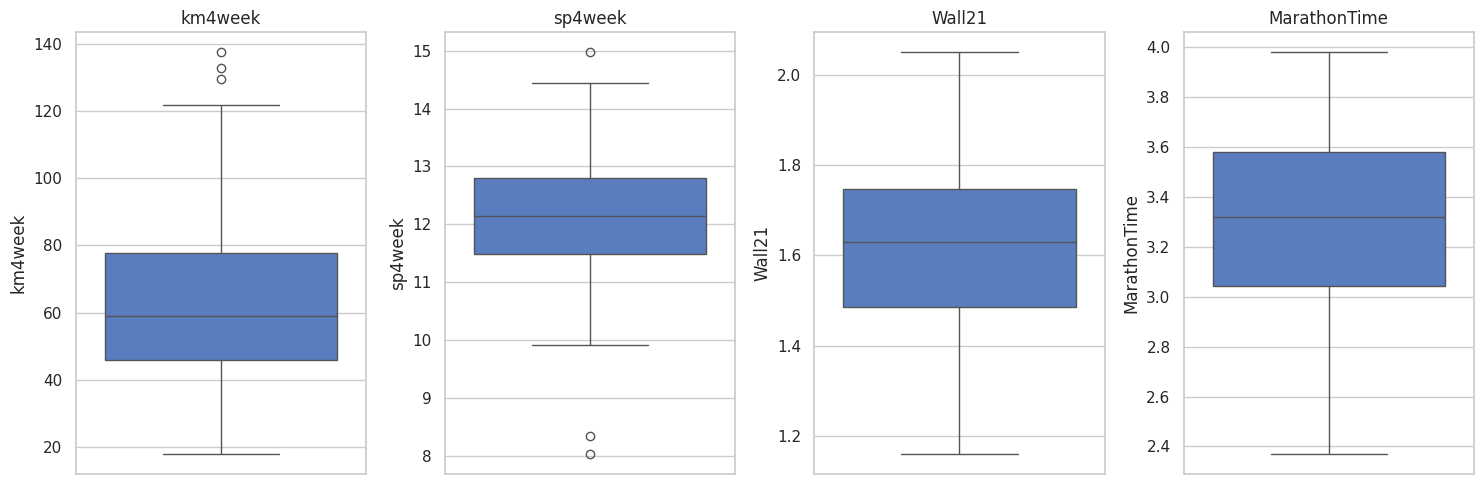

In [24]:
# Select only the numerical columns for boxplots
numerical_cols = df.select_dtypes(include=np.number).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

1. Si bien hay valores atípicos, ya no son incoherentes con las posibildiades de un maratón, a diferencia del dato eliminado en sp4week

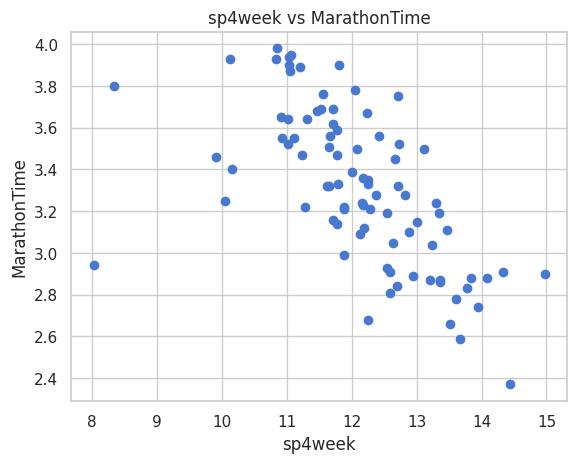

In [25]:
plt.scatter(x = df['sp4week'], y = df['MarathonTime'])
plt.title('sp4week vs MarathonTime')
plt.xlabel('sp4week')
plt.ylabel('MarathonTime')
plt.show()

In [26]:
#La matriz de correlación sugiere una muy alta correlación entre el tiempo del km 21 contra el tiempo total del maratón.
#Esto indica que el tiempo alcanzado en el km 31 es el mejor predictor del tiempo final. Solo que no es un dato que se pueda obtener antes del maratón
df.corr()

,km4week,sp4week,Wall21,MarathonTime
km4week,1.000000,0.189050,-0.550301,-0.600657
sp4week,0.189050,1.000000,-0.611671,-0.625100
Wall21,-0.550301,-0.611671,1.000000,0.942903
MarathonTime,-0.600657,-0.625100,0.942903,1.000000


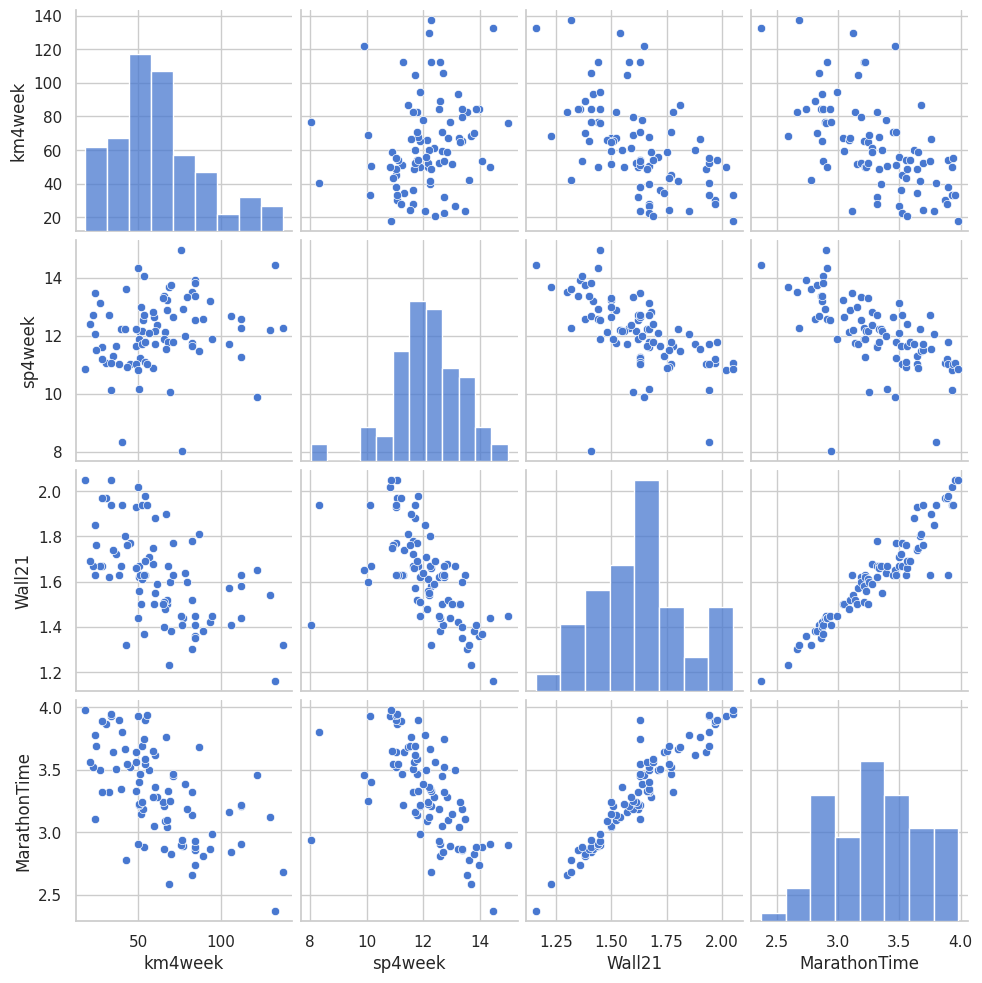

In [27]:
sns.pairplot(df[numerical_cols])
plt.show()

In [ ]:
#Modelo de regresión lineal


In [28]:
X = df[['km4week', 'sp4week', 'Wall21']]
y = df['MarathonTime']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - Mean Squared Error: {mse_linear:.4f}")
print(f"Linear Regression - R-squared: {r2_linear:.4f}")

Linear Regression - Mean Squared Error: 0.0188
Linear Regression - R-squared: 0.8831


In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.4f}")
print(f"Random Forest - R-squared: {r2_rf:.4f}")

Random Forest - Mean Squared Error: 0.0209
Random Forest - R-squared: 0.8700


In [38]:
print("Comparación de modelos")
print(f"Linear Regression - Mean Squared Error: {mse_linear:.4f}")
print(f"Linear Regression - R-squared: {r2_linear:.4f}")
print(f"Random Forest - Mean Squared Error: {mse_rf:.4f}")
print(f"Random Forest - R-squared: {r2_rf:.4f}")


Comparación de modelos
Linear Regression - Mean Squared Error: 0.0188
Linear Regression - R-squared: 0.8831
Random Forest - Mean Squared Error: 0.0209
Random Forest - R-squared: 0.8700


 Conclusiones

*   La regresión lineal tuvo un valor lieralmente más alto en la R cuadrada, esto sugiere el modelo puede explicar un 88% de la variación sobre la variable objetivo (tiempo del maratón)
*   De igual modo, el error medio cuadrático es ligeramente menor que en el segundo modelo, lo que sugiere que en promedio es un modelo con menor diferencia en el error de la estimación vs la predicción **
* La regresión obtenida es un modelo adecuado para predecir el tiempo que se hará un corredor en un maratón, sin embargo, al requerir como dato el tiempo obtenido el km 21, no es muy útil antes de la carrera.


